<a href="https://colab.research.google.com/github/parvika08/projects/blob/main/Garlic_Price_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
table = pd.read_html('/content/MonthWiseMarketArrivals-garlic,banglore.html')
table

[                                       0
 0  MONTH WISE MARKET ARRIVALS AND PRICES,
              0  ...                                                  3
 0  Crop Name :  ...  All  ABOHAR(PB)  AGRA(UP)  AHMEDABAD(GUJ)  AHM...
 1      Month :  ...  All  2021  2020  2019  2018  2017  2016  2015 ...
 2          NaN  ...                                                NaN
 
 [3 rows x 4 columns],
                                                   0
 0  MONTH WISE MARKET ARRIVALS AND PRICES FOR GARLIC,
                                                      0  ...                   6
 0    MarketMonth NameYearArrival (q)Price Minimum (...  ...                 NaN
 1                                               Market  ...  Modal Price (Rs/q)
 2                                            BANGALORE  ...                1100
 3                                            BANGALORE  ...                1250
 4                                            BANGALORE  ...                5444
 ..      

In [16]:
df = table[-1]
df

,Market,Month Name,Year,Arrival (q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
0,BANGALORE,January,2005,33291,600,1505,1100
1,BANGALORE,January,2006,30963,900,1800,1250
2,BANGALORE,January,2007,14907,3763,7300,5444
3,BANGALORE,January,2008,20101,2500,5286,3893
4,BANGALORE,January,2009,25975,500,1400,1009
...,...,...,...,...,...,...,...
193,BANGALORE,December,2017,32510,2323,4377,3350
194,BANGALORE,December,2018,40620,1914,3200,2600
195,BANGALORE,December,2019,18800,9063,13875,11469
196,BANGALORE,December,2020,2000,8000,12000,10000


In [17]:
df.drop(index=197, columns='Market', inplace=True, errors='ignore')
df

,Month Name,Year,Arrival (q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
0,January,2005,33291,600,1505,1100
1,January,2006,30963,900,1800,1250
2,January,2007,14907,3763,7300,5444
3,January,2008,20101,2500,5286,3893
4,January,2009,25975,500,1400,1009
...,...,...,...,...,...,...
192,December,2016,21470,9029,12214,10598
193,December,2017,32510,2323,4377,3350
194,December,2018,40620,1914,3200,2600
195,December,2019,18800,9063,13875,11469


In [18]:
df.columns = ['month','year','quantity','pricemin','pricemax','pricemod']
df['date'] = df['month']+' '+df['year']
df['date'] = pd.to_datetime(df['date'])
df

,month,year,quantity,pricemin,pricemax,pricemod,date
0,January,2005,33291,600,1505,1100,2005-01-01
1,January,2006,30963,900,1800,1250,2006-01-01
2,January,2007,14907,3763,7300,5444,2007-01-01
3,January,2008,20101,2500,5286,3893,2008-01-01
4,January,2009,25975,500,1400,1009,2009-01-01
...,...,...,...,...,...,...,...
192,December,2016,21470,9029,12214,10598,2016-12-01
193,December,2017,32510,2323,4377,3350,2017-12-01
194,December,2018,40620,1914,3200,2600,2018-12-01
195,December,2019,18800,9063,13875,11469,2019-12-01


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 196
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   month     197 non-null    object        
 1   year      197 non-null    object        
 2   quantity  197 non-null    int64         
 3   pricemin  197 non-null    object        
 4   pricemax  197 non-null    object        
 5   pricemod  197 non-null    object        
 6   date      197 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 12.3+ KB


In [20]:
df.iloc[:,3:6] = df.iloc[:,3:6].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 196
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   month     197 non-null    object        
 1   year      197 non-null    object        
 2   quantity  197 non-null    int64         
 3   pricemin  197 non-null    int64         
 4   pricemax  197 non-null    int64         
 5   pricemod  197 non-null    int64         
 6   date      197 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 12.3+ KB


In [21]:
df.index = pd.PeriodIndex(df.date, freq='M')
df

,month,year,quantity,pricemin,pricemax,pricemod,date
date,,,,,,,
2005-01,January,2005,33291,600,1505,1100,2005-01-01
2006-01,January,2006,30963,900,1800,1250,2006-01-01
2007-01,January,2007,14907,3763,7300,5444,2007-01-01
2008-01,January,2008,20101,2500,5286,3893,2008-01-01
2009-01,January,2009,25975,500,1400,1009,2009-01-01
...,...,...,...,...,...,...,...
2016-12,December,2016,21470,9029,12214,10598,2016-12-01
2017-12,December,2017,32510,2323,4377,3350,2017-12-01
2018-12,December,2018,40620,1914,3200,2600,2018-12-01


In [22]:
df.index.rename('DateNew',inplace=True)
df = df.sort_values('date')
df

,month,year,quantity,pricemin,pricemax,pricemod,date
DateNew,,,,,,,
2005-01,January,2005,33291,600,1505,1100,2005-01-01
2005-02,February,2005,33165,600,1500,1100,2005-02-01
2005-03,March,2005,35360,566,1568,1168,2005-03-01
2005-04,April,2005,41165,550,1603,1200,2005-04-01
2005-05,May,2005,35527,543,1600,1196,2005-05-01
...,...,...,...,...,...,...,...
2021-01,January,2021,50,8000,12000,10000,2021-01-01
2021-02,February,2021,11720,8000,12000,10000,2021-02-01
2021-03,March,2021,4250,6929,10371,8793,2021-03-01


In [23]:
df.drop(columns=['month','year'], inplace=True)
df

,quantity,pricemin,pricemax,pricemod,date
DateNew,,,,,
2005-01,33291,600,1505,1100,2005-01-01
2005-02,33165,600,1500,1100,2005-02-01
2005-03,35360,566,1568,1168,2005-03-01
2005-04,41165,550,1603,1200,2005-04-01
2005-05,35527,543,1600,1196,2005-05-01
...,...,...,...,...,...
2021-01,50,8000,12000,10000,2021-01-01
2021-02,11720,8000,12000,10000,2021-02-01
2021-03,4250,6929,10371,8793,2021-03-01


In [25]:
df_new = df[['date','pricemod']]

In [26]:
df_new = df_new.rename(columns={'date':'ds','pricemod':'y'})
df_new.to_csv('garlic.csv', index= False)

In [27]:
import fbprophet

In [28]:
fbprophet.Prophet?

In [44]:
op = fbprophet.Prophet(changepoint_prior_scale=0.5)
op.fit(df_new)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [45]:
forecast = op.make_future_dataframe(periods=12, freq='M')
forecast = op.predict(forecast)

In [46]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [47]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2005-01-01,2083.807373,-408.910886,4646.390305
1,2005-02-01,1496.553172,-1015.181654,3856.782973
2,2005-03-01,1426.248831,-1049.651476,4173.662454
3,2005-04-01,737.444997,-1705.013787,3171.672999
4,2005-05-01,1102.799901,-1324.956787,3750.086085
...,...,...,...,...
204,2022-02-28,7623.440342,5070.370567,10091.289835
205,2022-03-31,10113.260418,7699.249451,12674.930641
206,2022-04-30,11383.312725,8843.255597,13878.390504
207,2022-05-31,11697.228395,9253.094960,14080.888268


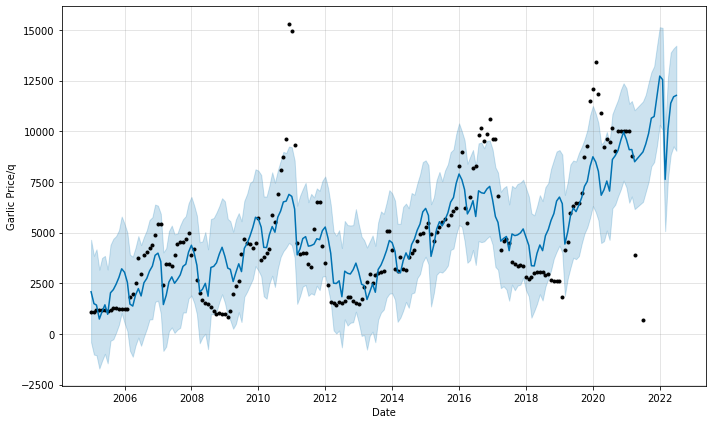

In [48]:
op.plot(forecast,xlabel='Date',ylabel='Garlic Price/q');